<h1>Unsupervised Machine Learning - Clustering Algorithms</h1>
<h2>K Means Clustering</h2>

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Algorithm</b>
<ol>
    <li>Choose number of clusters to be used, $k.$</li>
    <li>Choose $k$ points at random to be inital cluster centers.</li>
    <li>Measure distance (by some metric, default=Euclidean) from each data point to a cluster center.</li>
    <li>Assign to each data point the cluster center closest to it.</li>
    <li>Calcualte the $k$ means of the data in each cluster to get new cluster locations.</li>
    <li>If step 5 yields new clusters, repeat from step 3. Otherwise, terminate.</li>
</ol>

<b>Limitations</b>
<ul>
    <li>Number of clusters is to be predetermined.</li>
    <li>Inital clustering is random.</li>
    <li>The algoritm is sensitive to outliers.</li>
    <li>Each data point is only assigned to one cluster.</li>
</ul>

In [3]:
dataset = pd.DataFrame({
    'x': [11,21,28,17,29,33,24,45,45,52,51,52,55,53,55,61,62,70,72,10],
    'y': [39,36,30,52,53,46,55,59,63,70,66,63,70,58,23,14,8,18,7,24]
})

In [17]:
test = KMeans(n_clusters=3)
test.fit(dataset)

KMeans(n_clusters=3)

In [58]:
# help(test)

In [22]:
centroids, labels = test.cluster_centers_, test.labels_

In [59]:
centroids, labels # where cluster centers are / indices of the cluster that each data point belongs to.

(array([[21.625     , 41.875     ],
        [64.        , 14.        ],
        [50.42857143, 64.14285714]]),
 array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0],
       dtype=int32))

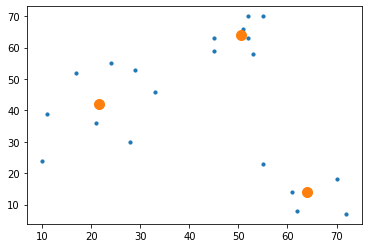

In [60]:
plt.scatter(dataset['x'], dataset['y'], s=10)
plt.scatter(centroids[:,0], centroids[:,1], s=100)

<h1>Hierarchical Clustering</h1>

This clustering method begins by assigning a cluster to every data point. In each iteration, the algorithm groups more clusters together based on an appropriate metric. This is repeated until a stop condition is met.

In [62]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
res_from_hier = cluster.fit_predict(dataset)

In [63]:
res_from_hier - labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Hierachical clustering always produces the same results on a given data set with the parameters given since it works from the bottom-up until a threshhold is met. K-means will produce different results each iteration due to the randomness of the initial clustering. Often we can run the algorithm a few times and choose the one with the lowest SSE (intertia_).

In [80]:
kmean_tests = []
aggl_clustering_tests = []
for i in range(0,11):
    kmean_tests.append(KMeans(n_clusters=3).fit(dataset)) 
    aggl_clustering_tests.append(AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit_predict(dataset))

In [90]:
# [(x.labels_, x.inertia_) for x in kmean_tests], [x for x in aggl_clustering_tests] #shows dif. results for k-means 

In [93]:
dataset['aggl_cluster']=aggl_clustering_tests[0]

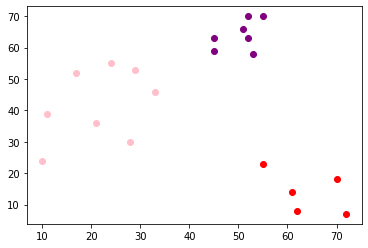

In [94]:
colors = ['pink','red','purple']
for i in range(0,3):
    plt.scatter(dataset[dataset['aggl_cluster']==i]['x'],dataset[dataset['aggl_cluster']==i]['y'],color=colors[i])
plt.show()